In [579]:
import os
import pandas as pd
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro, wilcoxon, norm
from statsmodels.stats.power import TTestPower
import seaborn as sns

In [580]:
def load_data(dir, filename):
    # 1. The main folder containing all your experiment subdirectories
    root_directory = dir

    # 2. The exact name of the csv file you want to read from each directory
    target_csv_name = 'Dice.csv'

    # 3. The name of the column that holds the performance metric
    performance_column_name = 'Dice_score'


    # This list will store our results before creating the final DataFrame
    results = []

    #print(f"Starting traversal of '{root_directory}'...")

    # os.walk is the perfect tool for this. It goes into every subdirectory.
    for dirpath, dirnames, filenames in os.walk(root_directory):
        # Check if our target CSV is in the list of files for the current directory
        if target_csv_name in filenames:
            experiment_name = os.path.basename(dirpath)
            file_path = os.path.join(dirpath, target_csv_name)
            
            try:
                # Read the CSV file, telling pandas there is NO header row
                temp_df = pd.read_csv(file_path, header=None)
                
                # Check if the DataFrame is not empty
                if not temp_df.empty:
                    # Get the last value from the first row.
                    # .iloc[0, -1] gets the item from the first row (index 0)
                    # and the last column (index -1).
                    last_performance_value = temp_df.iloc[0, -1]
                    
                    # Append the result as a dictionary to our list
                    results.append({
                        'experiment': experiment_name,
                        'dice_score': last_performance_value
                    })
                    #print(f"  [SUCCESS] Found and read data for '{experiment_name}'")
                else:
                    print(f"  [SKIPPED] File found for '{experiment_name}', but it is empty.")

            except Exception as e:
                # Catch potential errors like malformed files
                print(f"  [ERROR] Could not process file for '{experiment_name}'. Reason: {e}")

    # Convert the list of dictionaries into a final, clean pandas DataFrame
    
    df = pd.DataFrame(results)
    df['experiment'] = df['experiment'].str[9:]
    df = df.sort_values(by='experiment', ascending=True).reset_index(drop=True)
    df['dice_score'] = df['dice_score'] * 100
    print(df)
    #df.to_csv(filename)
    scores = df['dice_score'].values
    print("\n--- Traversal Complete ---")
    print("Final aggregated performance data:")
    
    #print(scores)
    
    
    return scores

In [581]:
dir_unet_pilot = '/home/eric/Documents/cervicalResearchIIP/result_test/UNetEffectiveness'
dir_mcunet_pilot = '/home/eric/Documents/cervicalResearchIIP/result_test/MCUEffectiveness'

In [582]:
unet_pilot = load_data(dir_unet_pilot, "unet_pilot.csv")


                experiment  dice_score
0   Pilot-Study-UNet-11423   78.305295
1   Pilot-Study-UNet-15303   83.394476
2   Pilot-Study-UNet-17439   77.021424
3   Pilot-Study-UNet-18733   77.491948
4   Pilot-Study-UNet-19566   18.843878
5   Pilot-Study-UNet-20289   74.369477
6   Pilot-Study-UNet-21199   71.423864
7   Pilot-Study-UNet-29697   80.924524
8    Pilot-Study-UNet-3262   79.112828
9   Pilot-Study-UNet-35468   79.129313
10  Pilot-Study-UNet-38853   71.797378
11  Pilot-Study-UNet-41559   85.654408
12  Pilot-Study-UNet-41825   78.004476
13   Pilot-Study-UNet-4704   76.530608
14  Pilot-Study-UNet-48592   76.824029
15  Pilot-Study-UNet-49567   80.447139
16  Pilot-Study-UNet-49600   61.586934
17  Pilot-Study-UNet-49697   77.232137
18   Pilot-Study-UNet-5270   72.836733
19  Pilot-Study-UNet-54877   84.160117
20  Pilot-Study-UNet-55529   76.526882
21  Pilot-Study-UNet-55931   77.142450
22  Pilot-Study-UNet-56455   81.081848
23  Pilot-Study-UNet-57903   54.786120
24   Pilot-Study-UNet-579

In [583]:
mcunet_pilot = load_data(dir_mcunet_pilot, "mcunet_pilot.csv")

                  experiment  dice_score
0   Pilot-Study-MCUNet-11423   72.693644
1   Pilot-Study-MCUNet-15303   38.611652
2   Pilot-Study-MCUNet-17439   77.818728
3   Pilot-Study-MCUNet-18733   83.896333
4   Pilot-Study-MCUNet-19566   14.688131
5   Pilot-Study-MCUNet-20289   81.915718
6   Pilot-Study-MCUNet-21199   66.467912
7   Pilot-Study-MCUNet-29697   15.965978
8    Pilot-Study-MCUNet-3262   80.934332
9   Pilot-Study-MCUNet-35468   83.702164
10  Pilot-Study-MCUNet-38853   76.198003
11  Pilot-Study-MCUNet-41559   85.103075
12  Pilot-Study-MCUNet-41825   78.990026
13   Pilot-Study-MCUNet-4704   76.184955
14  Pilot-Study-MCUNet-48592   69.859297
15  Pilot-Study-MCUNet-49567   73.988284
16  Pilot-Study-MCUNet-49600   85.448955
17  Pilot-Study-MCUNet-49697   69.284285
18   Pilot-Study-MCUNet-5270   76.628185
19  Pilot-Study-MCUNet-54877   85.721551
20  Pilot-Study-MCUNet-55529   85.154889
21  Pilot-Study-MCUNet-55931   66.730316
22  Pilot-Study-MCUNet-56455   85.646678
23  Pilot-Study-

In [584]:
def normalOrNot(unet, mcunet):
    # Use the column directly in qqplot
    sm.qqplot(unet, line='45', fit = True)
    plt.title("Q-Q Plot for MCU-Net")
    plt.show()
    
    stat, p = shapiro(unet)
    print(f"Shapiro-Wilk p-value unet: {p}")

    sm.qqplot(mcunet, line='45', fit = True)
    plt.title("Q-Q Plot for U-Net")
    plt.show()
    
    stat, p = shapiro(mcunet)
    print(f"Shapiro-Wilk p-value unet: {p}")

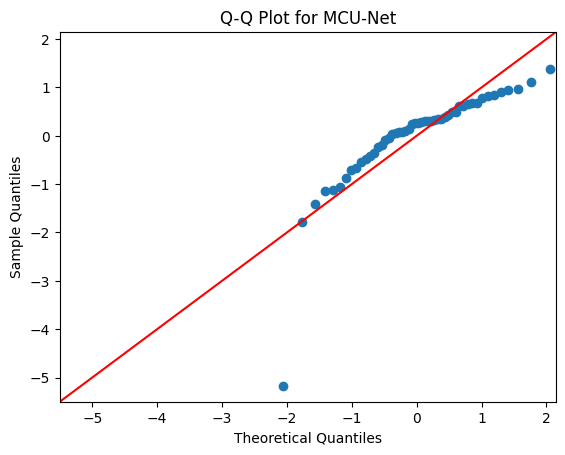

Shapiro-Wilk p-value unet: 1.0745266568139136e-07


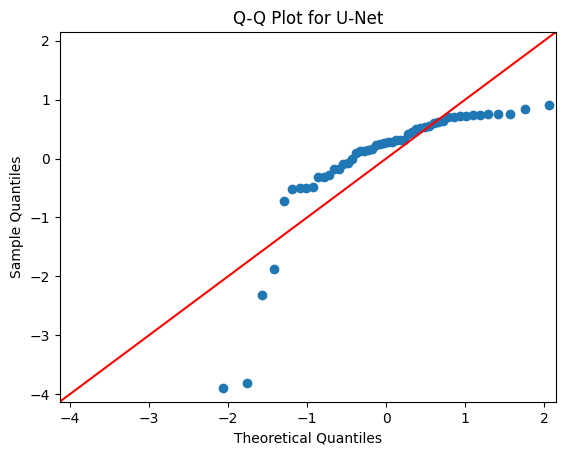

Shapiro-Wilk p-value unet: 5.256216825542071e-09


In [585]:
normalOrNot(unet_pilot, mcunet_pilot)

In [586]:
def hist(data, str):
    plt.hist(data, bins=10, density=True, alpha=0.7, color='purple', label='Histogram')
    # --- 3. Overlay the ideal normal curve ---

    # Fit a normal distribution to the data to get mean and standard deviation
    mu, std = norm.fit(data)

    # Create a range of x-values for the plot
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std) # Calculate the y-values for the normal curve

    # Plot the normal curve
    plt.plot(x, p, 'k', linewidth=2, label='Normal Curve')


    # --- 4. Add labels and show the plot ---
    plt.title(f"Histogram of {str} Dice score")
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.legend()


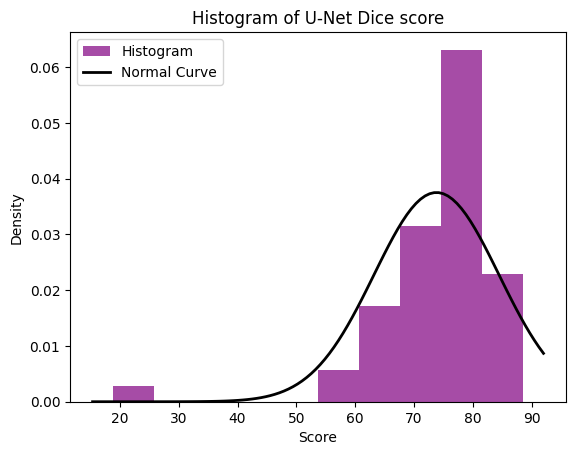

In [587]:
hist(unet_pilot, "U-Net")

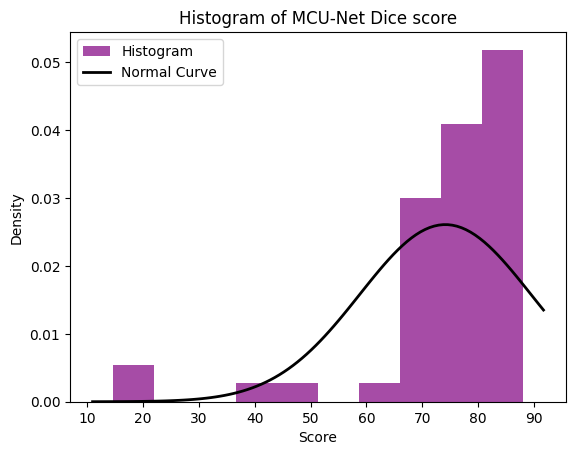

In [588]:
hist(mcunet_pilot, "MCU-Net")

In [589]:
def normalityDiff(unet, mcunet):
    diff = unet - mcunet
    shapiro_stat, shapiro_p = shapiro(diff)
    print(f"\n📊 Shapiro-Wilk Test on Difference:\nStatistic = {shapiro_stat}, p = {shapiro_p}")
    if shapiro_p < 0.05:
        print("→ Differences are NOT normally distributed. Use Wilcoxon test.")
    else:
        print("→ Differences are approximately normal. You may use paired t-test if desired.")

    # Optional: Plot histogram of differences
    plt.figure(figsize=(6,4))
    sns.histplot(diff, kde=True, bins=10, color='skyblue')
    plt.title("Distribution of Differences (A - B)")
    plt.xlabel("Difference")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📊 Shapiro-Wilk Test on Difference:
Statistic = 0.8237103940132993, p = 3.228802279474795e-06
→ Differences are NOT normally distributed. Use Wilcoxon test.


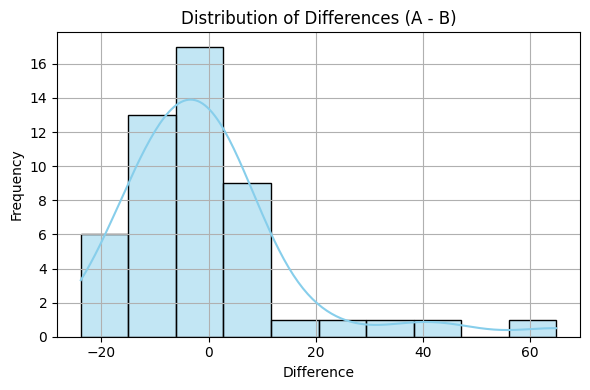

In [590]:
normalityDiff(unet_pilot, mcunet_pilot)

In [591]:
def wilcoxon_sample_size_approximation(unet, mcunet, alpha=0.05, power=0.8, safety_factor=0.86, desired_diff = 3):
    """
    Estimate Wilcoxon sample size using t-test calculation + safety factor
    """
    print("Pilot data summary:")
    print(f"Pilot data sample size: {len(unet)}")
    print(f"Algorithm U-Net mean: {np.mean(unet):.4f}")
    print(f"Algorithm MCU-Net mean: {np.mean(mcunet):.4f}")
    print(f"Difference in means: {abs(np.mean(unet) - np.mean(mcunet)):.4f}")
    print(f"Standard deviation of differences: {np.std(unet - mcunet, ddof=1):.4f}")

    # Step 1: Calculate Cohen's d as if it were a t-test
    diffs = unet - mcunet
    std_diffs = np.std(diffs, ddof=1)
    cohens_d = desired_diff / std_diffs
    #cohens_d = abs(np.mean(diffs) / np.std(diffs, ddof=1))
    
    # Step 2: CREATE INSTANCE FIRST, then call solve_power
    power_analysis = TTestPower()  # Create the instance
    n_ttest = power_analysis.solve_power(effect_size=cohens_d, 
                                        alpha=alpha, 
                                        power=power, 
                                        nobs=None,
                                        alternative='two-sided')
    
    # Step 3: Apply safety factor for non-parametric test
    n_wilcoxon = int(n_ttest / safety_factor)
    
    return n_wilcoxon, n_ttest, cohens_d


In [592]:
n_wilcoxon, n_ttest, d = wilcoxon_sample_size_approximation(unet_pilot, mcunet_pilot)
print(f"T-test sample size: {n_ttest:.0f}")
print(f"Wilcoxon sample size (15% increase): {n_wilcoxon}")
print(f"Effect size (Cohen's d): {d:.3f}")

Pilot data summary:
Pilot data sample size: 50
Algorithm U-Net mean: 73.8214
Algorithm MCU-Net mean: 74.1164
Difference in means: 0.2950
Standard deviation of differences: 15.8501
T-test sample size: 221
Wilcoxon sample size (15% increase): 257
Effect size (Cohen's d): 0.189


In [593]:
dir_unet = '/home/eric/Documents/cervicalResearchIIP/result_test/UNetEffectivenessReal'
dir_mcunet = '/home/eric/Documents/cervicalResearchIIP/result_test/MCUEffectivenessReal'

unet = load_data(dir_unet, "unet.csv")
mcunet = load_data(dir_mcunet, "mcunet.csv")

           experiment  dice_score
0    Study-UNet-10260   75.835471
1    Study-UNet-10400   80.229947
2    Study-UNet-10455   72.485588
3    Study-UNet-10633   71.452620
4    Study-UNet-11824   77.120667
..                ...         ...
259  Study-UNet-98175   68.280871
260  Study-UNet-98538   78.731284
261   Study-UNet-9951   85.544183
262  Study-UNet-99565   79.707783
263   Study-UNet-9986   69.215298

[264 rows x 2 columns]

--- Traversal Complete ---
Final aggregated performance data:
             experiment  dice_score
0    Study-MCUNet-10260   72.384493
1    Study-MCUNet-10400   83.172594
2    Study-MCUNet-10455   83.511444
3    Study-MCUNet-10633   83.334836
4    Study-MCUNet-11824   61.149320
..                  ...         ...
259  Study-MCUNet-98175   75.833821
260  Study-MCUNet-98538   74.351322
261   Study-MCUNet-9951   73.611201
262  Study-MCUNet-99565   83.896815
263   Study-MCUNet-9986   66.344357

[264 rows x 2 columns]

--- Traversal Complete ---
Final aggregated perf

In [594]:
def complete_wilcoxon_analysis(unet, mcunet, alg="U-Net", alg2="MCU-Net", alpha=0.05):
    """
    Complete Wilcoxon Signed-Rank Test analysis for paired algorithm comparison
    
    Parameters:
    A, B: Performance scores from Algorithm A and B (same instances)
    algorithm_A_name, algorithm_B_name: Names for reporting
    alpha: Significance level (default 0.05)
    
    Returns:
    Dictionary with all results
    """
    
    # Convert to numpy arrays
    A = np.array(unet)
    B = np.array(mcunet)
    
    # Ensure same length
    if len(A) != len(B):
        raise ValueError("A and B must have the same length (paired data)")
    
    print("="*60)
    print("🔬 WILCOXON SIGNED-RANK TEST ANALYSIS")
    print("="*60)
    
    # 1. Basic Statistics
    print("\n📊 DESCRIPTIVE STATISTICS:")
    print(f"{alg:15} | Mean: {np.mean(A):.4f} | Std: {np.std(A, ddof=1):.4f} | Median: {np.median(A):.4f}")
    print(f"{alg2:15} | Mean: {np.mean(B):.4f} | Std: {np.std(B, ddof=1):.4f} | Median: {np.median(B):.4f}")
    
    # 2. Differences Analysis
    diffs = A - B
    print(f"\n📈 DIFFERENCES ({alg} - {alg2}):")
    print(f"Mean difference:   {np.mean(diffs):8.4f}")
    print(f"Median difference: {np.median(diffs):8.4f}")
    print(f"Std of differences:{np.std(diffs, ddof=1):8.4f}")
    print(f"Sample size:       {len(diffs):8d}")
    
    # 3. Effect Size (multiple measures)
    print(f"\n📏 EFFECT SIZES:")
    
    # Cohen's d (for comparison)
    cohens_d = abs(np.mean(diffs)) / np.std(diffs, ddof=1)
    print(f"Cohen's d:         {cohens_d:8.4f}")
    
    # Probability of superiority
    def prob_superiority(x, y):
        n_wins = sum(1 for a in x for b in y if a > b)
        n_total = len(x) * len(y)
        return n_wins / n_total
    
    prob_A_better = prob_superiority(A, B)
    prob_effect_size = 2 * abs(prob_A_better - 0.5)
    print(f"P(A > B):          {prob_A_better:8.4f}")
    print(f"Prob. effect size: {prob_effect_size:8.4f}")
    
    # 4. Check assumptions
    print(f"\n🔍 ASSUMPTION CHECKS:")
    
    # Check for normality of differences (FYI - Wilcoxon doesn't require this)
    shapiro_stat, shapiro_p = shapiro(diffs)
    print(f"Shapiro-Wilk test for normality of differences:")
    print(f"  Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print(f"  → Differences appear normal (p > 0.05)")
        print(f"  → Could also use paired t-test, but Wilcoxon is still valid")
    else:
        print(f"  → Differences are not normal (p ≤ 0.05)")
        print(f"  → Wilcoxon test is appropriate choice")
    
    # Check for ties
    n_ties = len(diffs) - len(diffs[diffs != 0])
    print(f"Number of ties (zero differences): {n_ties}")
    if n_ties > 0:
        print(f"  → {n_ties/len(diffs)*100:.1f}% of pairs are tied")
        if n_ties/len(diffs) > 0.2:
            print(f"  ⚠️  High percentage of ties - consider effect on power")
    
    # 5. Perform Wilcoxon Signed-Rank Test
    print(f"\n🧪 WILCOXON SIGNED-RANK TEST RESULTS:")
    
    # Two-sided test
    try:
        statistic, p_value = wilcoxon(A, B, alternative='less', zero_method='wilcox')
        
        print(f"Test statistic (W): {statistic:8.0f}")
        print(f"P-value (two-sided): {p_value:8.6f}")
        print(f"Significance level:  {alpha:8.6f}")
        
        # Interpretation
        if p_value < alpha:
            print(f"\n✅ RESULT: SIGNIFICANT DIFFERENCE")
            print(f"   p-value ({p_value:.6f}) < α ({alpha})")
            print(f"   Reject null hypothesis")
            if np.median(diffs) > 0:
                print(f"   → {alg} performs significantly better")
            else:
                print(f"   → {alg2} performs significantly better")
        else:
            print(f"\n❌ RESULT: NO SIGNIFICANT DIFFERENCE")
            print(f"   p-value ({p_value:.6f}) ≥ α ({alpha})")
            print(f"   Fail to reject null hypothesis")
            print(f"   → No significant difference between algorithms")
            
    except ValueError as e:
        print(f"⚠️  Error in Wilcoxon test: {e}")
        print("This might happen if all differences are zero")
    
    # 6. One-sided tests (bonus)
    print(f"\n🔄 ONE-SIDED TESTS:")
    try:
        _, p_greater = wilcoxon(A, B, alternative='greater')
        _, p_less = wilcoxon(A, B, alternative='less')
        print(f"P-value ({alg} > {alg2}): {p_greater:.6f}")
        print(f"P-value ({alg} < {alg2}): {p_less:.6f}")
    except:
        print("Could not compute one-sided tests")
    
    # 7. Confidence interval for median difference (if possible)
    print(f"\n📊 PRACTICAL SIGNIFICANCE:")
    print(f"Median difference: {np.median(diffs):.4f}")
    print(f"Effect size interpretation:")
    if cohens_d < 0.2:
        print(f"  → Very small effect (d = {cohens_d:.3f})")
    elif cohens_d < 0.5:
        print(f"  → Small effect (d = {cohens_d:.3f})")
    elif cohens_d < 0.8:
        print(f"  → Medium effect (d = {cohens_d:.3f})")
    else:
        print(f"  → Large effect (d = {cohens_d:.3f})")
    
    # Return results dictionary
    results = {
        'statistic': statistic if 'statistic' in locals() else None,
        'p_value': p_value if 'p_value' in locals() else None,
        'effect_size_d': cohens_d,
        'effect_size_prob': prob_effect_size,
        'median_difference': np.median(diffs),
        'mean_difference': np.mean(diffs),
        'prob_A_better': prob_A_better,
        'is_significant': p_value < alpha if 'p_value' in locals() else None,
        'sample_size': len(A)
    }
    
    return results

In [595]:
results = complete_wilcoxon_analysis(
    unet, 
    mcunet,
    alg="U-Net",
    alg2="MCU-Net"
)

# Access specific results
print(f"\n🎯 SUMMARY:")
print(f"Significant difference: {results['is_significant']}")
print(f"P-value: {results['p_value']:.6f}")
print(f"Effect size (Cohen's d): {results['effect_size_d']:.4f}")

🔬 WILCOXON SIGNED-RANK TEST ANALYSIS

📊 DESCRIPTIVE STATISTICS:
U-Net           | Mean: 73.1827 | Std: 14.2456 | Median: 76.9289
MCU-Net         | Mean: 74.6067 | Std: 14.9121 | Median: 78.5529

📈 DIFFERENCES (U-Net - MCU-Net):
Mean difference:    -1.4241
Median difference:  -1.3178
Std of differences: 19.3914
Sample size:            264

📏 EFFECT SIZES:
Cohen's d:           0.0734
P(A > B):            0.4274
Prob. effect size:   0.1452

🔍 ASSUMPTION CHECKS:
Shapiro-Wilk test for normality of differences:
  Statistic: 0.8070, p-value: 0.0000
  → Differences are not normal (p ≤ 0.05)
  → Wilcoxon test is appropriate choice
Number of ties (zero differences): 0

🧪 WILCOXON SIGNED-RANK TEST RESULTS:
Test statistic (W):    13654
P-value (two-sided): 0.001004
Significance level:  0.050000

✅ RESULT: SIGNIFICANT DIFFERENCE
   p-value (0.001004) < α (0.05)
   Reject null hypothesis
   → MCU-Net performs significantly better

🔄 ONE-SIDED TESTS:
P-value (U-Net > MCU-Net): 0.998996
P-value (U-Net